<a href="https://colab.research.google.com/github/Jeet8204/ML-Algorithms/blob/main/movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving moviereviews.csv to moviereviews.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import io
df = pd.read_csv("moviereviews.csv")

In [ ]:
df.head()


,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [ ]:
# Missing Values in the data frame
df.isnull().sum()
# Removing reviews that are NaN
df = df.dropna()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [ ]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

         neg       0.82      0.83      0.83       188
         pos       0.84      0.83      0.84       205

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393



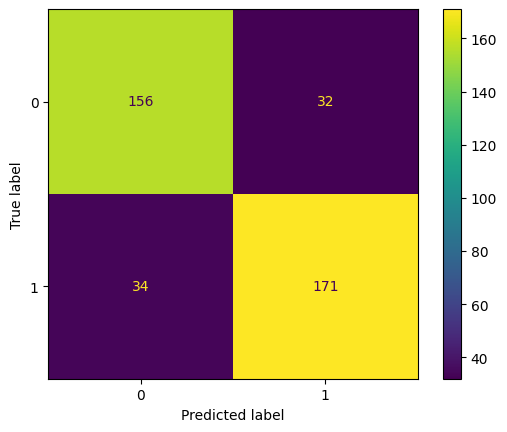

In [ ]:
from sklearn.metrics import classification_report
preds = pipe.predict(X_test)


print(classification_report(y_test, preds))


cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()
